In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn


#ISO-8859-1
#latin-1
sdata = pandas.read_csv('/Users/kevinruiz/Documents/GitHub/HTH-2023-Spotify-Data-Analysis/Data/Spotify-2023.csv',encoding='ISO-8859-1')
sdata = sdata.drop([0, 574])
sdata['streams'] = pandas.to_numeric(sdata['streams'],errors='coerce')
 
sdata.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24


[Text(0.5, 1.0, "Top 5 Most Streamed Tracks from the 90's in 2023"),
 Text(0.5, 0, 'Track Name'),
 Text(0, 0.5, 'Streams (Billion)')]

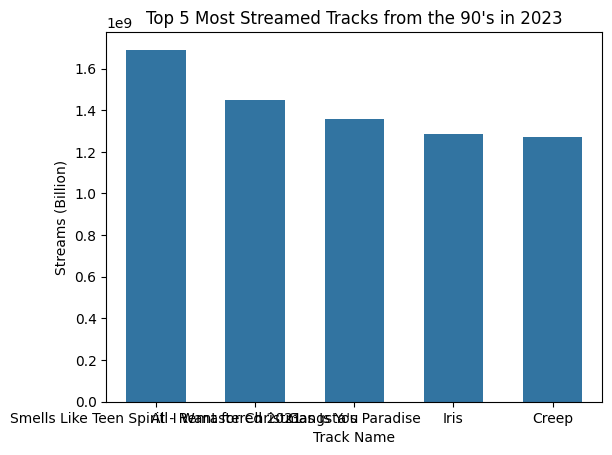

In [2]:
### 1. What were the top 5 most streamed tracks from the 90's in 2023? And plot their streams in a bar graph.


nineties_tracks = sdata[(sdata['released_year'] >= 1990)&(sdata['released_year']<=1999)]

sorted = nineties_tracks.sort_values('streams',ascending = False).iloc[1:6]
seaborn.barplot(x= sorted['track_name'], y=sorted['streams'], width = 0.6, dodge=False).set(title="Top 5 Most Streamed Tracks from the 90's in 2023", xlabel='Track Name', ylabel='Streams (Billion)')

Text(0.5, 1.0, "Ed Sheran's Top 6 Songs and their Percentage of his Top Streams in 2023")

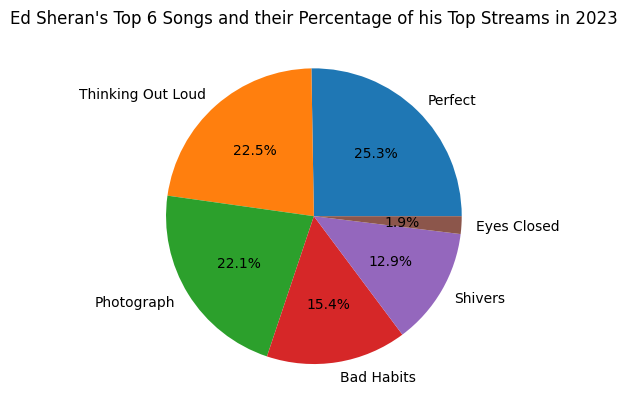

In [3]:
### 2. How much percent did each of Ed Sheran's Top Songs contribute to his total streams in 2023? Create a pie chart comparing all 6 of them. 

ed_sheran = sdata[(sdata['artist(s)_name'] == 'Ed Sheeran')].sort_values('streams',ascending = False).iloc[1:7]
plt.pie(ed_sheran['streams'], labels =ed_sheran['track_name'], autopct='%1.1f%%')
plt.title("Ed Sheran's Top 6 Songs and their Percentage of his Top Streams in 2023")
#autopct='%1.1f%%'



([<matplotlib.axis.XTick at 0x11af5db20>,
 [Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1920, 0, '1920'),
  Text(1930, 0, '1930'),
  Text(1940, 0, '1940'),
  Text(1950, 0, '1950'),
  Text(1960, 0, '1960'),
  Text(1970, 0, '1970'),
  Text(1980, 0, '1980'),
  Text(1990, 0, '1990'),
  Text(2000, 0, '2000'),
  Text(2010, 0, '2010'),
  Text(2020, 0, '2020')])

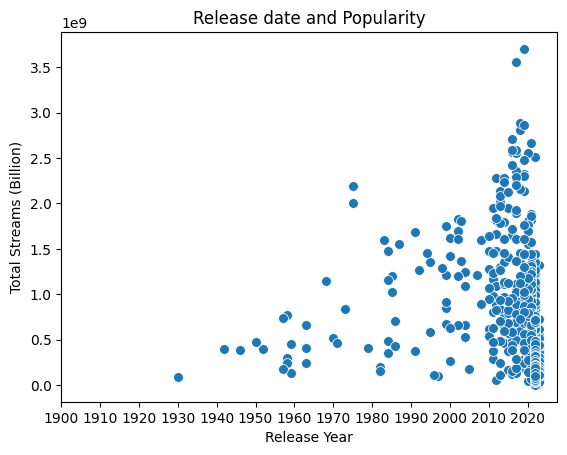

In [4]:
### 3. Create a scatterplot showing how release date relates to total streams.

seaborn.scatterplot(x=sdata['released_year'], y=sdata['streams'],s = 50).set(title = 'Release date and Popularity',ylabel = 'Total Streams (Billion)',xlabel = 'Release Year')
plt.xticks(np.arange(1900, 2030, step=10))

#seaborn.set(rc={"figure.figsize":(13,4)})
#plt.rcParams["figure.figsize"] = (25,10)

[Text(0.5, 1.0, 'Relation Bettween BPM and Total Streams'),
 Text(0.5, 0, 'BPM (Beats Per Minute)'),
 Text(0, 0.5, 'Streams (Billions)')]

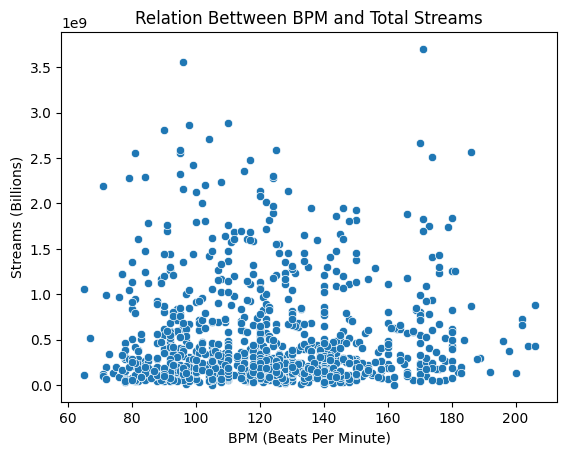

In [5]:
### 4. Create a scatterplot comparing the bpm and streams.

seaborn.scatterplot(x =sdata['bpm'], y=sdata['streams']).set(title='Relation Bettween BPM and Total Streams', xlabel='BPM (Beats Per Minute)',ylabel='Streams (Billions)')





Text(0.5, 1.0, 'Top 10 Artists and Their Percentage in Total Streams')

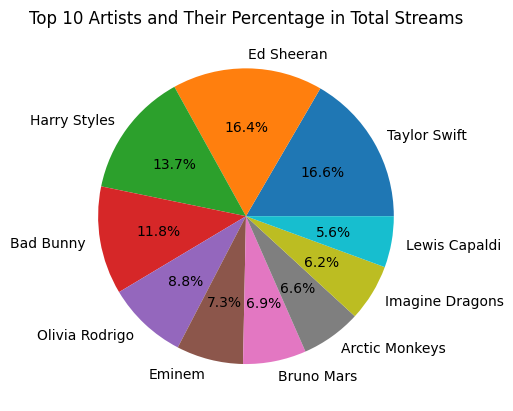

In [21]:
### 4. How much streams did the top 10 artists make in total, compare how much each made using a pie chart. 
artists = sdata.groupby(['artist(s)_name']).sum()
so = artists.sort_values('streams',ascending = False).iloc[1:11]

plt.pie(so['streams'], labels = so.index, autopct='%1.1f%%')
plt.title("Top 10 Artists and Their Percentage in Total Streams")